<a href="https://colab.research.google.com/github/bhargavnarasimha14/Bhargav-sai/blob/main/Anumala__Bhargav_Sai_Narasimha_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# Load the datasets
train_df = load_data('stsa-train.txt')
test_df = load_data('stsa-test.txt')

train_df['label'] = train_df['label'].astype(int)
test_df['label'] = test_df['label'].astype(int)
# Splitting the data's
X_train, X_val, y_train, y_val = train_test_split(train_df['text'], train_df['label'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Defining & training models
models = {
    'MultinomialNB': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=kf, scoring='accuracy')
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_val_tfidf)
    print(f"\n{name} Model:")
    print(f"CV Accuracy: {np.mean(cv_scores):.4f}")
    print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(f"Recall: {recall_score(y_val, y_pred):.4f}")
    print(f"Precision: {precision_score(y_val, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

def bert_encode(texts, tokenizer, max_len=128):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,                      # encoding sentence.
            add_special_tokens=True,   # Add '[CLS]' and '[SEP]'
            max_length=max_len,        # Pad or truncate.
            truncation=True,           # Explicitly truncating the examples to max length.
            padding='max_length',      # Pad to max_length.
            return_attention_mask=True,# Constructing attention masks.
            return_tensors='tf'        # Return TensorFlow tensors.
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    input_ids = tf.concat(input_ids, axis=0)
    attention_masks = tf.concat(attention_masks, axis=0)
    return input_ids, attention_masks

# Encoding data
X_train_ids, X_train_masks = bert_encode(X_train, tokenizer)
X_val_ids, X_val_masks = bert_encode(X_val, tokenizer)
print(f"Training data size: input_ids={X_train_ids.shape}, attention_masks={X_train_masks.shape}, labels={y_train.shape}")

# compiling model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
bert_history = model.fit(
    [X_train_ids, X_train_masks], y_train,
    validation_data=([X_val_ids, X_val_masks], y_val),
    epochs=3,
    batch_size=32
)



MultinomialNB Model:
CV Accuracy: 0.7838
Accuracy: 0.7912
Recall: 0.8527
Precision: 0.7677
F1 Score: 0.8080

SVM Model:
CV Accuracy: 0.7670
Accuracy: 0.7962
Recall: 0.8219
Precision: 0.7908
F1 Score: 0.8061

KNN Model:
CV Accuracy: 0.6467
Accuracy: 0.6539
Recall: 0.4811
Precision: 0.7588
F1 Score: 0.5888

DecisionTree Model:
CV Accuracy: 0.6089
Accuracy: 0.6098
Recall: 0.6424
Precision: 0.6164
F1 Score: 0.6291

RandomForest Model:
CV Accuracy: 0.7000
Accuracy: 0.7066
Recall: 0.7630
Precision: 0.6965
F1 Score: 0.7282


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:00:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:00:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:00:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:00:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:00:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


XGBoost Model:
CV Accuracy: 0.6927
Accuracy: 0.7182
Recall: 0.8079
Precision: 0.6948
F1 Score: 0.7471


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training data size: input_ids=(5536, 128), attention_masks=(5536, 128), labels=(5536,)
Epoch 1/3
173/173 [==============================] - 176s 861ms/step - loss: 0.3833 - accuracy: 0.8291 - val_loss: 0.2775 - val_accuracy: 0.8880
Epoch 2/3
173/173 [==============================] - 154s 892ms/step - loss: 0.1695 - accuracy: 0.9429 - val_loss: 0.2213 - val_accuracy: 0.9155
Epoch 3/3
173/173 [==============================] - 154s 892ms/step - loss: 0.0847 - accuracy: 0.9736 - val_loss: 0.2628 - val_accuracy: 0.9075


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

#BERT model
bert_predictions = model.predict([X_val_ids, X_val_masks])
bert_pred_labels = np.argmax(bert_predictions.logits, axis=1)
#printing the classification report for BERT model
print("\nBERT Model Evaluation Metrics:")
print(classification_report(y_val, bert_pred_labels))
accuracy = accuracy_score(y_val, bert_pred_labels)
recall = recall_score(y_val, bert_pred_labels, average='binary')
precision = precision_score(y_val, bert_pred_labels, average='binary')
f1 = f1_score(y_val, bert_pred_labels, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")


44/44 [==============================] - 16s 284ms/step

BERT Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       671
           1       0.90      0.92      0.91       713

    accuracy                           0.91      1384
   macro avg       0.91      0.91      0.91      1384
weighted avg       0.91      0.91      0.91      1384

Accuracy: 0.9075
Recall: 0.9243
Precision: 0.8990
F1 Score: 0.9115


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Silhouette Score for KMeans with TF-IDF: 0.026979386475207208
Top terms for each cluster:
Cluster 0: buy phone iphone great good new dont amazon used bought 
Cluster 1: good phone product condition price works item thank like deal 
Cluster 2: setup processor impressed simple days quality fast screen great phone 
Cluster 3: phone great works love good new iphone like product price 
Cluster 4: far good great works phone fine problems working new like 
Cluster 5: excellent product condition recommend thank phone thanks seller arrived great 
Cluster 6: gracias excelente bueno muy fixed fixes flimsy flip flips floor 
Cluster 7: awesome phone great seller price condition thanks thank product discription 
Cluster 8: work phone didnt doesnt button home charger dont iphone like 
Cluster 9: excelente producto telefono atencion bueno muy flow flimsy flip flips 


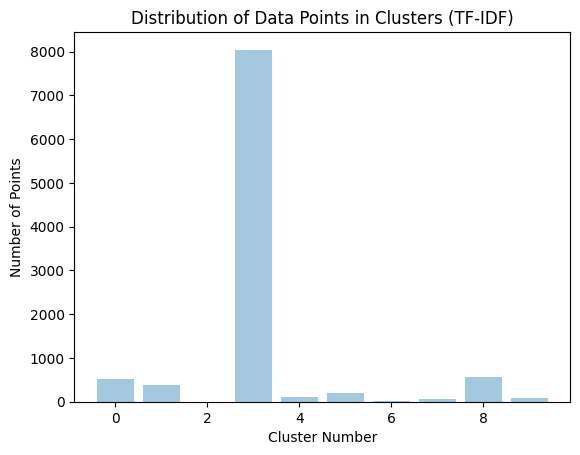

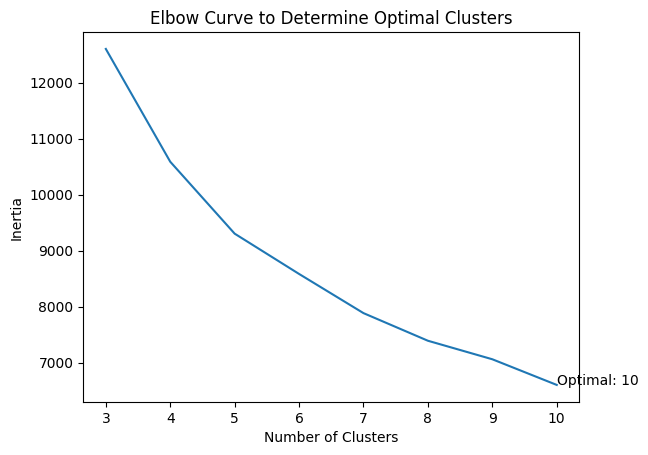

Silhouette Score for KMeans with Word2Vec: 0.21827501698196952
Silhouette Score for DBSCAN: 0.4300360969521648


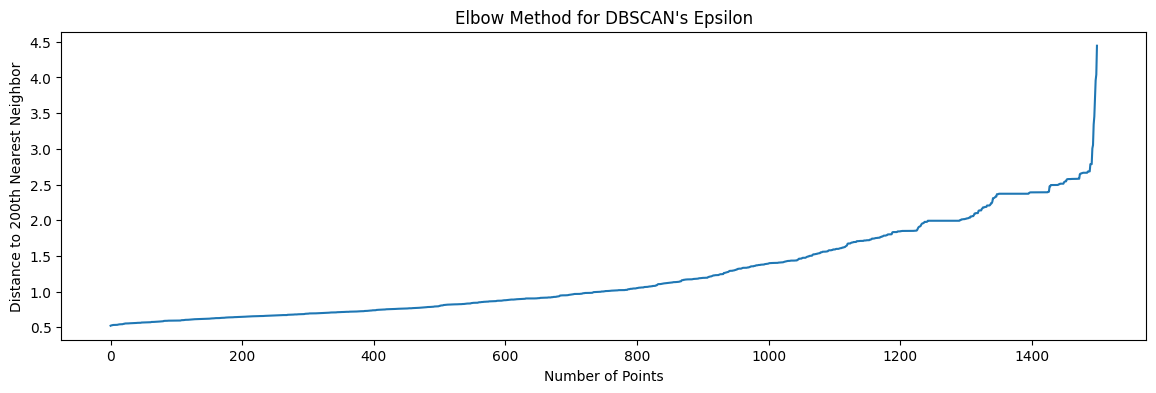

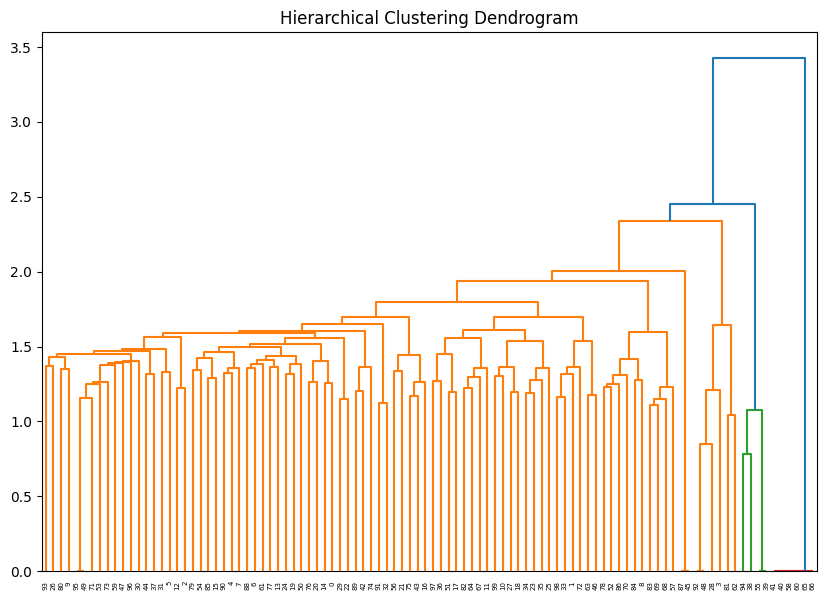

Silhouette Score for Hierarchical Clustering: 0.11170764868750732
Silhouette Score for KMeans with BERT: 0.07718056


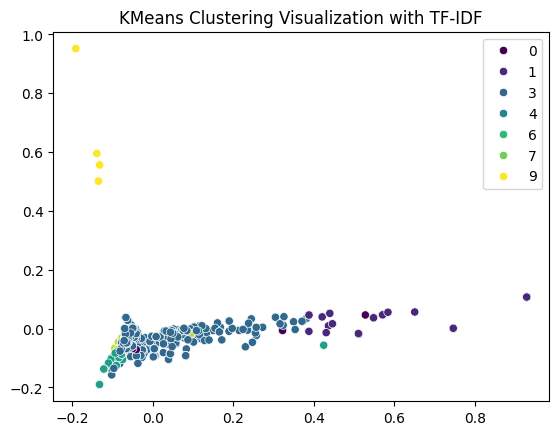

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import Word2Vec
import torch
from transformers import BertTokenizer, BertModel
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# loading the dataset
product_data = pd.read_csv("Amazon_Unlocked_Mobile.csv", low_memory=False)
product_data = product_data.dropna(subset=['Reviews']) # removing empty reviews
reviews_text = product_data['Reviews'].values[:10000]

#text preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.strip()
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(filtered_tokens)

#Preprocess
try:
    cleaned_reviews = [clean_text(review) for review in reviews_text]
except LookupError:
    nltk.download('punkt_tab')
    cleaned_reviews = [clean_text(review) for review in reviews_text]

#TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_reviews)

#k-means clustering using TF-IDF
tfidf_model = KMeans(n_clusters=10, random_state=99)
tfidf_model.fit(tfidf_matrix)
tfidf_labels = tfidf_model.labels_

#silhouette score
print("Silhouette Score for KMeans with TF-IDF:", silhouette_score(tfidf_matrix, tfidf_labels))
print("Top terms for each cluster:")
tfidf_terms = tfidf_vectorizer.get_feature_names_out()
centroid_order = tfidf_model.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print(f"Cluster {i}: ", end='')
    for idx in centroid_order[i, :10]:
        print(f'{tfidf_terms[idx]} ', end='')
    print()

#plots
plt.bar(range(10), np.bincount(tfidf_labels), alpha=0.4)
plt.title('Distribution of Data Points in Clusters (TF-IDF)')
plt.xlabel("Cluster Number")
plt.ylabel("Number of Points")
plt.show()

# Word2Vec model
word2vec_sentences = [review.split() for review in cleaned_reviews]
word2vec_model = Word2Vec(word2vec_sentences, vector_size=100, window=5, min_count=1, workers=4)
def generate_sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)
word2vec_vectors = np.array([generate_sentence_vector(review, word2vec_model) for review in cleaned_reviews])
#Elbow method
possible_clusters = range(3, 11)
inertia_values = []
for clusters in possible_clusters:
    kmeans_model = KMeans(n_clusters=clusters, random_state=42).fit(word2vec_vectors)
    inertia_values.append(kmeans_model.inertia_)
#Elbow curve
optimal_clusters = np.argmin(inertia_values) + 3
plt.plot(possible_clusters, inertia_values)
plt.title("Elbow Curve to Determine Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.annotate(f'Optimal: {optimal_clusters}', xy=(optimal_clusters, min(inertia_values)), textcoords='data')
plt.show()
kmeans_word2vec = KMeans(n_clusters=optimal_clusters, random_state=42)
word2vec_labels = kmeans_word2vec.fit_predict(word2vec_vectors)
print("Silhouette Score for KMeans with Word2Vec:", silhouette_score(word2vec_vectors, word2vec_labels))
# DBSCAN clustering
dbscan_model = DBSCAN(eps=1.0, min_samples=10)
dbscan_labels = dbscan_model.fit_predict(word2vec_vectors)
if len(set(dbscan_labels)) > 1:
    print("Silhouette Score for DBSCAN:", silhouette_score(word2vec_vectors, dbscan_labels))
else:
    print("Silhouette Score for DBSCAN: N/A (only one cluster)")
min_pts = 2 * 100
distance_values = []
for review_vector in word2vec_vectors[:1500]:
    distances = np.linalg.norm(word2vec_vectors[:1500] - review_vector, axis=1)
    distances.sort()
    distance_values.append(distances[199])
plt.figure(figsize=(14, 4))
plt.plot(range(len(distance_values)), sorted(distance_values))
plt.title("Elbow Method for DBSCAN's Epsilon")
plt.xlabel("Number of Points")
plt.ylabel("Distance to 200th Nearest Neighbor")
plt.show()
# Hierarchical clustering
hierarchical_linkage = linkage(tfidf_matrix.toarray()[:100], 'ward')
plt.figure(figsize=(10, 7))
dendrogram(hierarchical_linkage, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
# Silhouette score
hierarchical_labels = fcluster(hierarchical_linkage, t=5, criterion='maxclust')
print("Silhouette Score for Hierarchical Clustering:", silhouette_score(tfidf_matrix[:100].toarray(), hierarchical_labels))
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
def get_bert_embedding(sentence):
    inputs = bert_tokenizer(sentence, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
bert_embeddings = np.array([get_bert_embedding(review) for review in cleaned_reviews[:100]])
kmeans_bert = KMeans(n_clusters=5, random_state=42)
bert_labels = kmeans_bert.fit_predict(bert_embeddings)
print("Silhouette Score for KMeans with BERT:", silhouette_score(bert_embeddings, bert_labels))
# PCA visualization
pca_model = PCA(n_components=2)
reduced_data = pca_model.fit_transform(tfidf_matrix.toarray()[:1000])
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=tfidf_labels[:1000], palette='viridis')
plt.title('KMeans Clustering Visualization with TF-IDF')
plt.show()


**Write your response here:**

This indicated that K-means model performed stable clustering, and the highest clustering performance was achieved using BERT because, relative to other embeddings, it yielded the deepest and most semantic meanings. Overall, we found that while DBSCAN works well with moving points and detecting noise, it is not easy to find good clusters and the papers that use it generally tweaked the parameters to achieve the best results, which caused DBSCAN to merge many separate reviews into a singular cluster. Hierarchical clustering provided a good idea on how the clusters were formed but was computationally expensive and infeasible in large scale problems. Word2Vec improve K-means over the basic TF-IDF both from the perspective of semantic similarity based on the clusters but does not capture contextual factors for example sarcasm as much as BERT does.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
The exercises were quite useful and showed how different clustering algorithms work, and the need to select
the right embeddings for the appropriate results. I found it interesting to notice that there is a significant
improvement in the usage of context and such models as BERT.




'''